<a href="https://colab.research.google.com/github/honyango/Analog-World-Clock/blob/master/Diabetes_Prediction_using_XGBClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###Objective
    
   The dataset comprises of 8 input variables that describe the medical details of patients and one output variable to indicate whether the patient will have an onset of diabetes within 5 years.
    The objective is to diagnostically predict whether or not a patient has diabetes, based on the given diagnostic measurements.

###Importing required Dependencies

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

###Importing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ms data analytics Groups/January-Session/Ensemble Methods/Xgboost/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset is very small and doesn't have any null values. All the parameters are numerical.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Though the difference between minimum and maximum vaues  in each column is not that big, its better to normalize the data.

####Exploratory Data Analysis

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Splitting the dataset
X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]
# By default the sample size is 25%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [ ]:

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
}
eval_set = [(dtest, "eval")]
model = xgb.train(params, dtrain, num_boost_round=100, evals=eval_set, early_stopping_rounds=10)

[0]	eval-logloss:0.57148
[1]	eval-logloss:0.53837
[2]	eval-logloss:0.52168
[3]	eval-logloss:0.51585
[4]	eval-logloss:0.52106
[5]	eval-logloss:0.51653
[6]	eval-logloss:0.51536
[7]	eval-logloss:0.52175
[8]	eval-logloss:0.52769
[9]	eval-logloss:0.53164
[10]	eval-logloss:0.53286
[11]	eval-logloss:0.54089
[12]	eval-logloss:0.54216
[13]	eval-logloss:0.54019
[14]	eval-logloss:0.54554
[15]	eval-logloss:0.55308
[16]	eval-logloss:0.56100


In [ ]:
predictions = model.predict(dtest)

In [ ]:

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = [1 if prob > 0.5 else 0 for prob in predictions]

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.62%


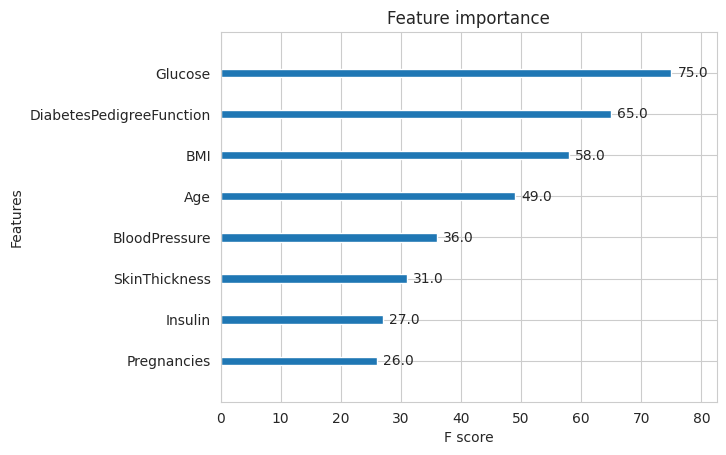

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
xgb.plot_tree(model, ax=plt.gca())

NameError: name 'model' is not defined

<Figure size 2000x1500 with 0 Axes>